In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files #colab specific library to load files
uploaded = files.upload() # Upload File; Here we will upload parkinson's data
# Note: Load both train_data and test_data csv files

#Confirm Upload
for fn in uploaded.keys():
  print('You uploaded file "{name}" with length {length} bytes'.format(name=fn,length = len(uploaded[fn])))

KeyboardInterrupt: ignored

# Printing and Data Visualization

In [ ]:
#display header and a few rows

df = pd.read_csv('winequality-red.csv')
display(df)

In [ ]:
print(df.dtypes)

In [ ]:
for col in df.columns.values:
  list_vals = pd.unique(df[col])
  print(col + ' is of type ' + str(df[col].dtypes) + ' and has, ' + str(len(list_vals)) + ' unique values and ' + str(df[col].isin([0]).sum()) + ' null entries ')
  if(len(list_vals) < 10):
    list_str=''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print(' These are : ' + list_str[0:len(list_str)-2]) 


fixed acidity is of type float64 and has, 96 unique values and 0 null entries 
volatile acidity is of type float64 and has, 143 unique values and 0 null entries 
citric acid is of type float64 and has, 80 unique values and 132 null entries 
residual sugar is of type float64 and has, 91 unique values and 0 null entries 
chlorides is of type float64 and has, 153 unique values and 0 null entries 
free sulfur dioxide is of type float64 and has, 60 unique values and 0 null entries 
total sulfur dioxide is of type float64 and has, 144 unique values and 0 null entries 
density is of type float64 and has, 436 unique values and 0 null entries 
pH is of type float64 and has, 89 unique values and 0 null entries 
sulphates is of type float64 and has, 96 unique values and 0 null entries 
alcohol is of type float64 and has, 65 unique values and 0 null entries 
quality is of type int64 and has, 6 unique values and 0 null entries 
 These are : 5, 6, 7, 4, 8, 3



**Observation**
1.   There is no variable which has a single unique value
2.   All the variables have a significant amount of unique values, hence can be treated as continuous variables
3. The target variable, here quality has basically 6 unique values


# *Plotting the distributions for visualization*

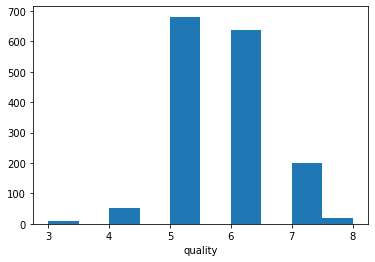

In [ ]:
 #Plotting histograms for visualizing discrete data
 for col in df.columns.values:
   if(df[col].dtypes == 'int64'):
     plt.hist(df[col])
     plt.xlabel(col)
     plt.show()


1.   From the above figure, we can clearly infer that most of the samples belong to the quality = 5,6,7 class.
2.   Since the no. of unique values is quite high for each attribute, i won't be drawing the histogram for continuous variables



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27a1a047b8>,
      dtype=object)

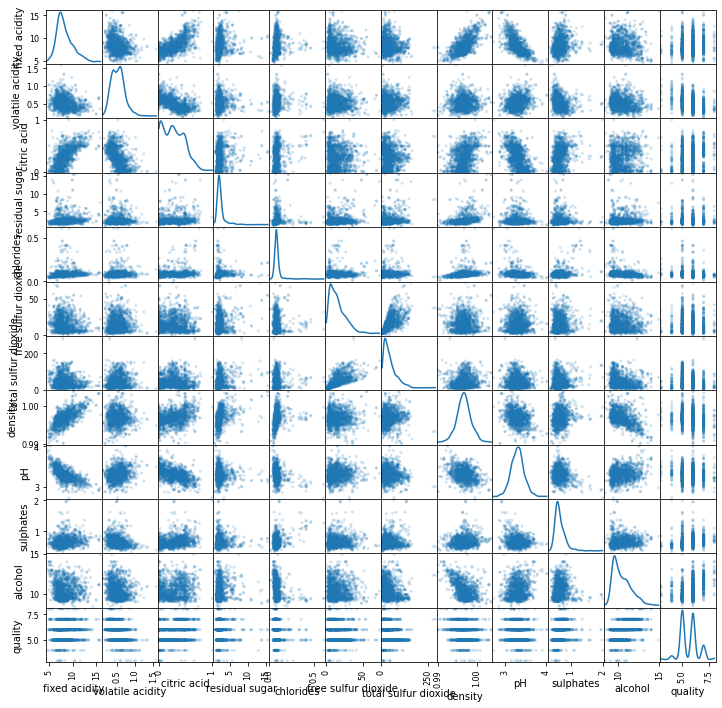

In [ ]:
#We will also plot pair-wise scatter matrices
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.2, figsize=(12,12),diagonal='kde')

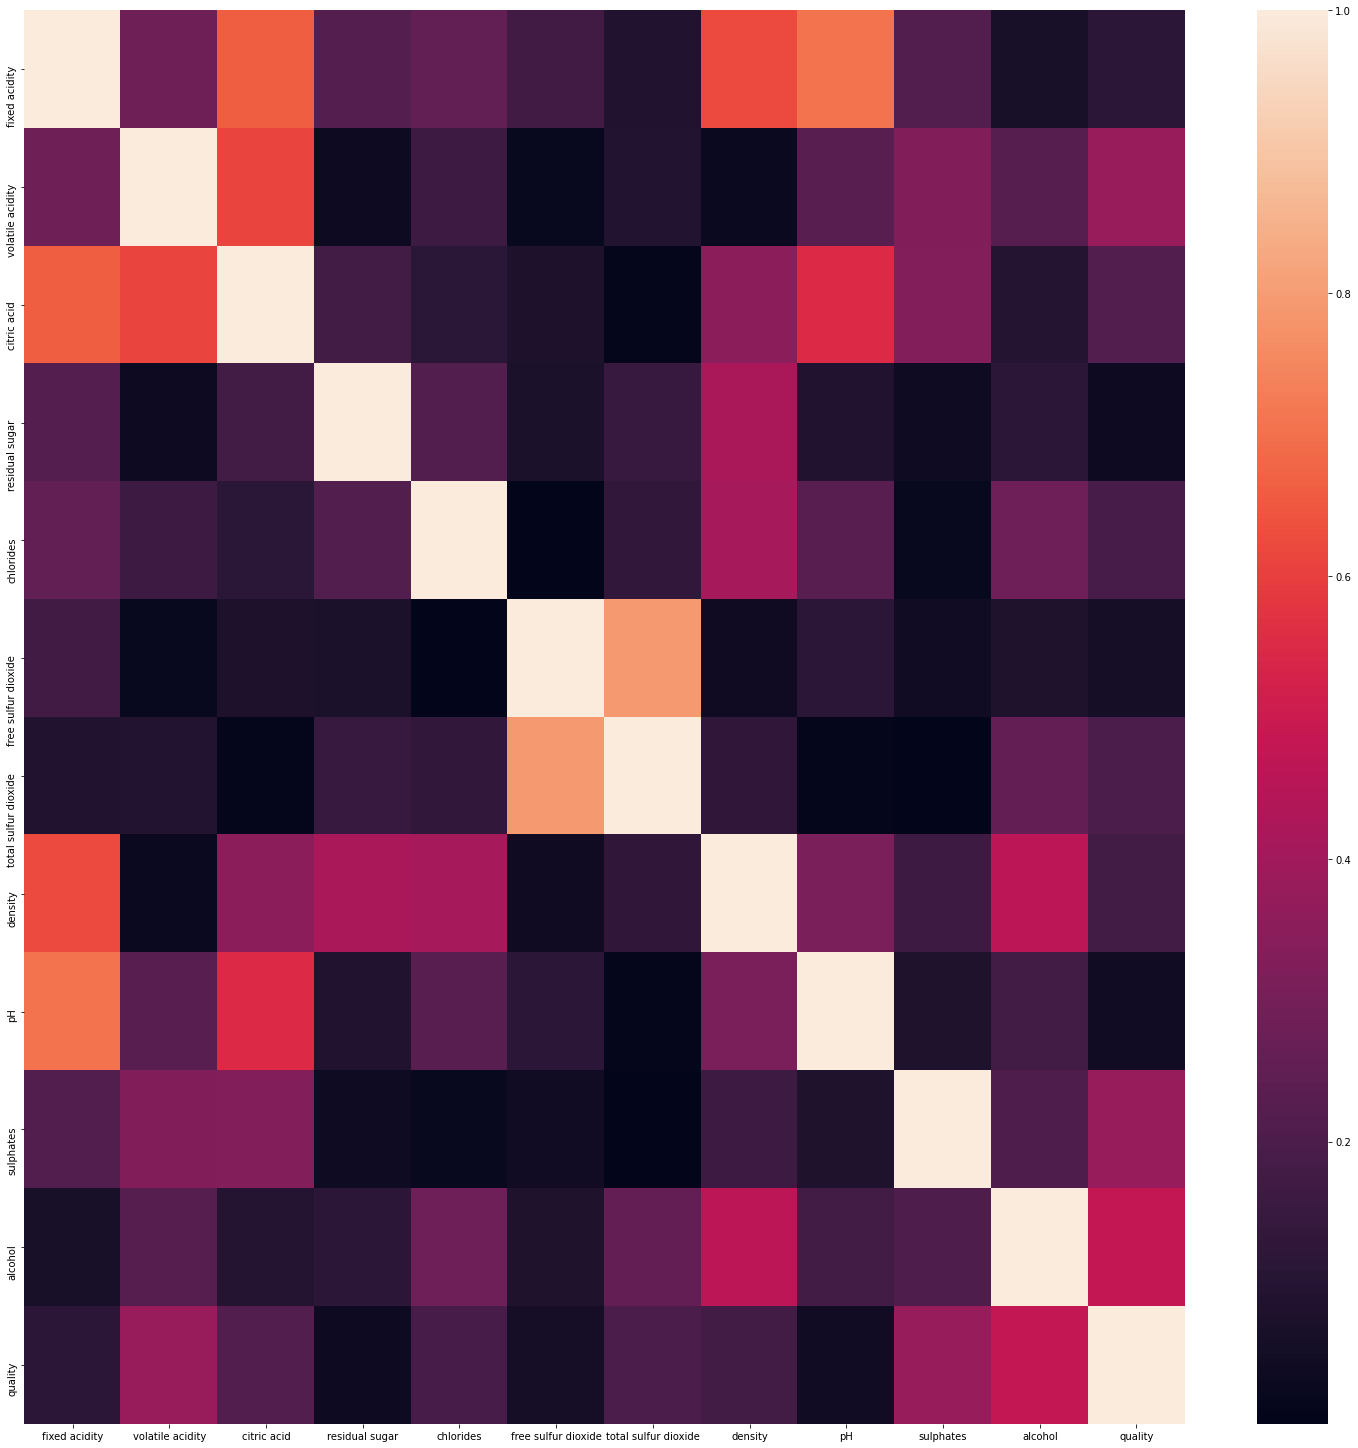

In [ ]:
#Plotting Heat Map for the variables
corrMatrix = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(abs(corrMatrix),annot =False)
plt.show()

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Preparing Data

In [ ]:
X = df.drop('quality', axis = 1)
y = df.quality

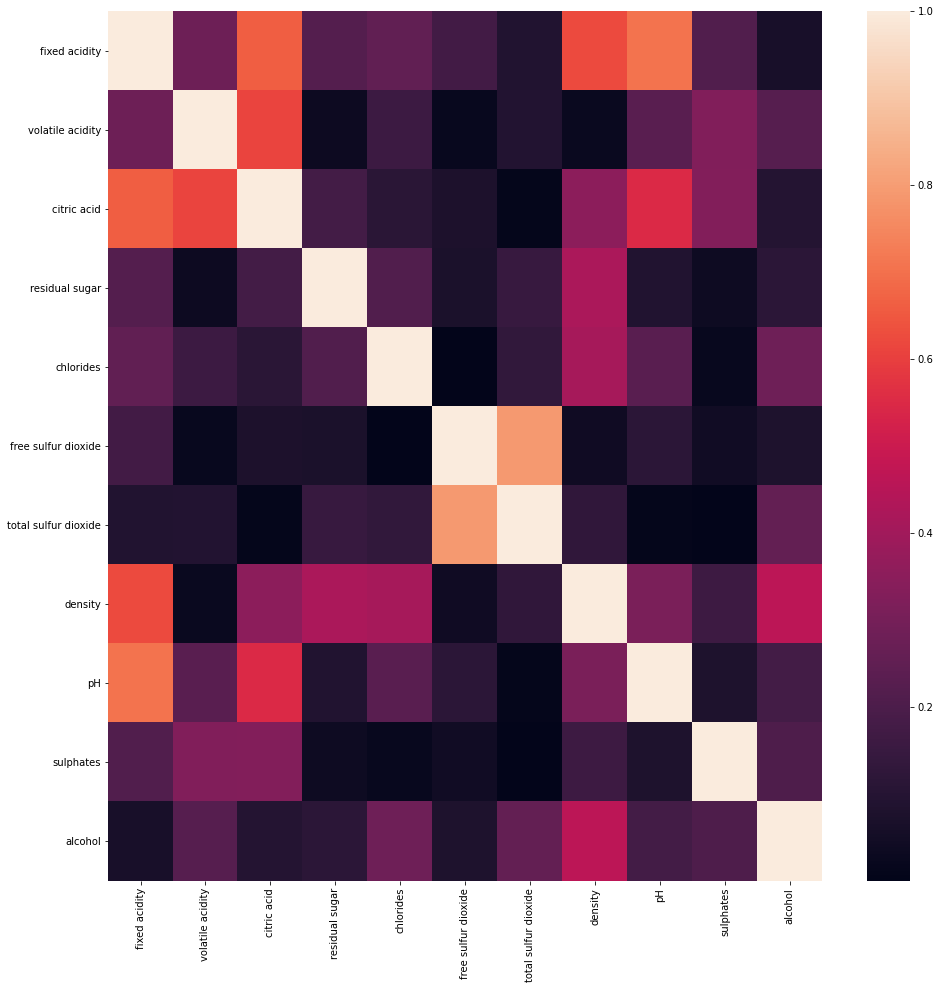

In [ ]:
#Plotting Heat Map for the variables
corrMatrix = X.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(abs(corrMatrix),annot =False)
plt.show()

In [ ]:
 from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.6,random_state=2)
 print(train_X,train_y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
482            10.6             0.360         0.59  ...  3.04       1.05      9.4
1390            6.0             0.490         0.00  ...  3.58       0.59     12.5
563             7.6             0.290         0.49  ...  3.31       0.61     10.1
130             8.0             0.745         0.56  ...  3.24       0.66      9.4
1496            7.7             0.540         0.26  ...  3.26       0.59      9.7
...             ...               ...          ...  ...   ...        ...      ...
299             6.9             0.670         0.06  ...  3.68       0.71      9.6
1558            6.9             0.630         0.33  ...  3.22       0.56      9.5
493             8.7             0.690         0.31  ...  3.48       0.74     11.6
527             7.0             0.380         0.49  ...  3.39       0.77     11.4
1192            7.2             0.250         0.37  ...  3.52       0.80     12.4

[639 rows x 11 

In [ ]:
#Normalizing the data so that each column has mean 0 and variance 1
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(train_X)
X_tr = pd.DataFrame(scaler.transform(train_X))
y_tr = pd.DataFrame(train_y)
X_ts = pd.DataFrame(scaler.transform(test_X))
y_ts = pd.DataFrame(test_y)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_tr,y_tr)

print('The accuracy of linear regression model on training data is ' + str(reg.score(X_tr,y_tr)))
print('The accuracy of linear regression model on testing data is '+ str(reg.score(X_ts,y_ts)))

The accuracy of linear regression model on training data is 0.34214797617981774
The accuracy of linear regression model on testing data is 0.35322001482841736


In [ ]:
from sklearn import linear_model
hyp_param = [0.05, 0.39]

for i in hyp_param:

  lasso_reg = linear_model.Lasso(alpha = i, max_iter =10, tol=0.001)
  lasso_reg.fit(X_tr,y_tr)

  print('The accuracy of linear regression model on training data is ' + str(lasso_reg.score(X_tr,y_tr)) + ' for hyperparameter ' +str(i))
  print('The accuracy of linear regression model on testing data is '+ str(lasso_reg.score(X_ts,y_ts)) + ' for hyperparameter ' +str(i))

#print(lasso_reg.coef_)

The accuracy of linear regression model on training data is 0.31933243241673004 for hyperparameter 0.05
The accuracy of linear regression model on testing data is 0.3322059781533998 for hyperparameter 0.05
The accuracy of linear regression model on training data is 0.0 for hyperparameter 0.39
The accuracy of linear regression model on testing data is -0.018991526670319114 for hyperparameter 0.39


**Observation**
1. As the value of hyper parameter 'alpha' is increased, we notice that the coefficients of certain attributes start turning zero.
2. The last non-zero weight of some attribute turns to zero when 'alpha' becomes 0.39.
3. This reason for this being that as value of alpha increases the constraint parameter in the error term, starts dominating leading to the weights going to zero.

In [ ]:
from sklearn.linear_model import Ridge
hyp_param = [20, 30]

for i in hyp_param:

  ridge_reg = Ridge(alpha = i, max_iter =10, tol=0.1)
  ridge_reg.fit(X_tr,y_tr)

  print('The accuracy of ridge regression model on training data is ' + str(ridge_reg.score(X_tr,y_tr)) + ' for hyperparameter ' +str(i))
  print('The accuracy of ridge egression model on testing data is '+ str(ridge_reg.score(X_ts,y_ts))+ ' for hyperparameter ' + str(i))

The accuracy of ridge regression model on training data is 0.34184588516074954 for hyperparameter 20
The accuracy of ridge egression model on testing data is 0.3531336408635969 for hyperparameter 20
The accuracy of ridge regression model on training data is 0.34152062028785485 for hyperparameter 30
The accuracy of ridge egression model on testing data is 0.35284530602332986 for hyperparameter 30


# Cross-Validation for Random Forest Classifier and SVM algorithms

In [ ]:
#Training and Validation

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
mean_accuracy_rfc = cross_validate(rfc,X_ts,y_ts,cv=5,scoring='accuracy')['test_score'].mean()

print('The mean accuracy for the Random Forest Classifier is '+ str(mean_accuracy_rfc))

NameError: ignored

In [ ]:
from sklearn import svm

svc = svm.SVC()
mean_accuracy_svm =cross_validate(svc,X_ts,y_ts,cv=5,scoring='accuracy')['test_score'].mean()

print('The mean accuracy for SVM algorithm is '+ str(mean_accuracy_svm))

# Variation of Hyperparameters and estimation of the best hyper-parameter

In [ ]:
print('Training SVC using GridSearchCV')

from sklearn import svm
hyperparameters = {'kernel':('rbf','linear','poly'),'C':(25,35,105), 'degree':[3,5,7]}
#The above hyperparameters would be tried by us

svc = svm.SVC()
clf = GridSearchCV(estimator=svc,param_grid=hyperparameters)
clf.fit(np.array(X_tr),np.squeeze(y_tr))
print('Best Parameters:')
print(clf.best_params_)
print('Best score is '+str(clf.best_score_))

Training SVC using GridSearchCV
Best Parameters:
{'C': 25, 'degree': 3, 'kernel': 'poly'}
Best score is 0.5665600393700787


In [ ]:
print('Random Forest Classifier')
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
hyperparameters = {'max_depth':[5,10,30,50],'n_estimators':[10,50,100]}
clf = GridSearchCV(rfc,param_grid=hyperparameters)
clf.fit(np.array(X_tr),np.squeeze(y_tr))
print('Best Parameters:')
print(clf.best_params_)
print('Best score is '+str(clf.best_score_))

Random Forest Classifier
Best Parameters:
{'max_depth': 50, 'n_estimators': 50}
Best score is 0.6229330708661418


Testing the above models for WhiteWine.csv file

In [ ]:
df2 = pd.read_csv('winequality-red.csv')
display(df2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
Xw = df2.drop('quality',axis=1)
yw = df2.quality

In [ ]:
reg.score(Xw,yw)

-10.620120534369637

We can clearly notice that for the linear regression model, it is resulting into an error of -10% which is quite erroneous.

In [ ]:
 from sklearn.feature_selection import RFECV
 from sklearn.svm import SVR

 estimator = SVR(kernel="linear")
 selector = RFECV(estimator, step=1, cv=5)
 selector = selector.fit(X_tr, y_tr)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x = selector.ranking_
x

array([1, 1, 3, 4, 1, 1, 1, 2, 5, 1, 1])

In [ ]:
X_trf = X_tr
X_tsf = X_ts

In [ ]:
for i in range(0,len(x)):
  if x[i] != 1:
    X_trf.drop(i,axis  = 1, inplace = True)
    X_tsf.drop(i, axis =1, inplace = True) 

In [ ]:
print('Training SVC using GridSearchCV for best features')

from sklearn import svm
hyperparameters = {'kernel':('rbf','linear','poly'),'C':(25,35,105), 'degree':[3,5,7]}
#The above hyperparameters would be tried by us

svc = svm.SVC()
clf = GridSearchCV(estimator=svc,param_grid=hyperparameters)
clf.fit(np.array(X_trf),np.squeeze(y_tr))
print('Best Parameters:')
print(clf.best_params_)
print('Best score is '+str(clf.best_score_))

Training SVC using GridSearchCV for best features
Best Parameters:
{'C': 25, 'degree': 3, 'kernel': 'linear'}
Best score is 0.5633981299212598


In [ ]:
from sklearn import linear_model
hyp_param = [10, 50]

for i in hyp_param:

  lasso_reg = linear_model.Lasso(alpha = i, max_iter =10, tol=0.001)
  lasso_reg.fit(X_trf,y_tr)

  # print('The accuracy of linear regression model on training data is ' + str(lasso_reg.score(X_tr,y_tr)) + ' for hyperparameter ' +str(i))
  # print('The accuracy of linear regression model on testing data is '+ str(lasso_reg.score(X_ts,y_ts)) + ' for hyperparameter ' +str(i))
  print(lasso_reg.coef_)

[ 0. -0. -0. -0. -0.  0.  0.]
[ 0. -0. -0. -0. -0.  0.  0.]
